# Clustering

In [28]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
Faculty_info=pd.read_csv('salaries.csv')


In [29]:
Faculty_info.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [30]:
X1=Faculty_info[['phd','service']].values
X1


array([[11, 11],
       [12,  6],
       [23, 20],
       [40, 31],
       [20, 18],
       [20, 20],
       [20, 17],
       [18, 18],
       [29, 19],
       [51, 51],
       [39, 22],
       [23, 23]], dtype=int64)

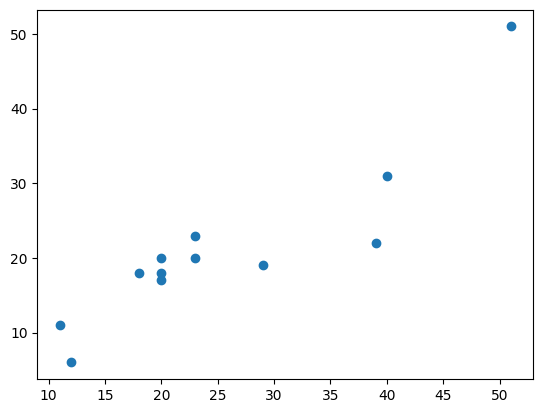

In [31]:
plt.scatter(X1[:,0],X1[:,1])

In [32]:
Y=Faculty_info ['salary'].values
Y


array([103613,   9300, 110515, 131205, 104800, 122400,  81285, 126300,
        94350,  57800, 128250, 134778], dtype=int64)

In [33]:
from sklearn import cluster


In [34]:
cls_faculty = cluster.KMeans(n_clusters = 3)
cls_faculty.fit(X1)


KMeans(n_clusters=3)

In [35]:
print(cls_faculty.labels_)


[1 1 1 0 1 1 1 1 1 2 0 1]


In [36]:
print(cls_faculty.cluster_centers_)


[[39.5        26.5       ]
 [19.55555556 16.88888889]
 [51.         51.        ]]


In [37]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X1, cls_faculty.labels_))


0.5310004169134627


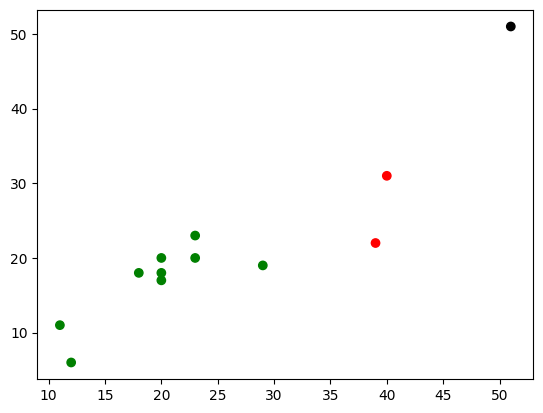

In [38]:
Faculty_info['label']=cls_faculty.labels_
colors = {0:'red', 1:'green', 2:'black'}

plt.scatter(Faculty_info['phd'], Faculty_info['service'], c=[colors[i] for i in Faculty_info['label']])

# Classification

In [39]:
from sklearn import datasets

In [40]:
iris = datasets.load_iris()

In [41]:
X = iris.data
X[1:10,:]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [42]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
import sklearn.model_selection as ms
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size= 0.3, random_state=7)



In [44]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix


In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XTrain, YTrain)
pred=knn.predict(XTest)
pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [46]:
print(confusion_matrix(YTest, pred))

[[12  0  0]
 [ 0 15  1]
 [ 0  2 15]]


In [47]:
print(classification_report(YTest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [48]:
k_neighbours = list(range(1,21,2))
n_grid = [{'n_neighbors': k_neighbours}]
n_grid


[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}]

In [49]:
YTest

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [50]:
model = neighbors.KNeighborsClassifier()
cv_knn = GridSearchCV(estimator=model,param_grid=n_grid,cv=ms.KFold(n_splits=10))  
cv_knn.fit(XTrain, YTrain)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

In [51]:
best_k = cv_knn.best_params_['n_neighbors']


In [52]:
print('The best parameter is k={0}'.format(best_k))


The best parameter is k=11


# Regression

In [53]:
mammals = pd.read_csv('mammals.csv',sep=',')

mammals


,Mammal,body_weight,brain_weight
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


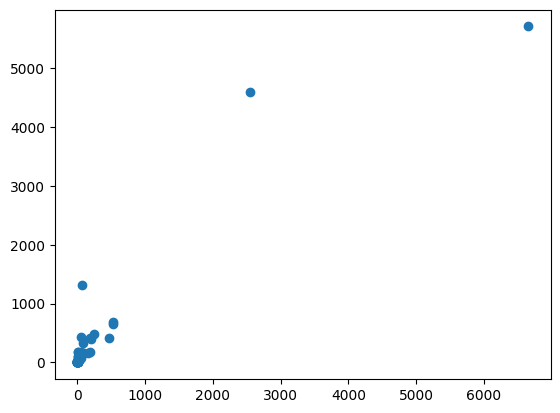

In [54]:
plt.scatter(mammals['body_weight'], mammals['brain_weight'])

In [55]:
body_data = mammals['body_weight']
body_data.shape

(62,)

In [56]:
brain_data = mammals['brain_weight']
brain_data.shape

(62,)

In [57]:
from sklearn import linear_model
sk_regr = linear_model.LinearRegression()


In [58]:
import statsmodels.api as sm
body_data = sm.add_constant(body_data)
body_data

,const,body_weight
0,1.0,3.385
1,1.0,0.480
2,1.0,1.350
3,1.0,465.000
4,1.0,36.330
...,...,...
57,1.0,160.000
58,1.0,0.900
59,1.0,1.620
60,1.0,0.104


In [59]:
reg1=sk_regr.fit(body_data, brain_data)
reg1


LinearRegression()

Model Summary

In [60]:
print(sk_regr.coef_)


[0.         0.96649637]


In [61]:
print(sk_regr.intercept_)


91.00439620740681


In [62]:
print(sk_regr.score(body_data, brain_data))


0.8726620843043331


In [63]:

y_pred = sk_regr.predict(body_data)
y_pred

array([  94.27598641,   91.46831446,   92.3091663 ,  540.42520718,
        126.11720924,  117.73768574,  105.33753734,   92.00955243,
         95.05401599,   91.41515716,   91.10201234,   91.89357287,
         91.97089258,   91.00922869,   91.06238599,   94.38713349,
         92.93738894,   92.64744003, 2552.67064467,   91.02662562,
        271.8358666 ,  594.54900376,   91.76309586,  100.66935988,
         94.19383422,   91.19769548,   92.36715609,  602.28097471,
        291.06914432,  173.15658746,   91.72926848,  150.927171  ,
       6522.0712267 ,   94.38713349,   97.57657151,  124.83176908,
         94.9187065 ,   91.12037577,   91.02662562,   91.01406117,
         92.35749112,  332.62848813,   93.42063713,  144.64494461,
        187.65403297,  141.41684675,  101.20093289,   91.53596921,
        148.99417827,   94.48378313,   95.14873263,   91.27501519,
         91.07688343,   91.12230876,   91.05078803,  276.5716988 ,
         93.90388531,  245.64381504,   91.87424294,   92.57012

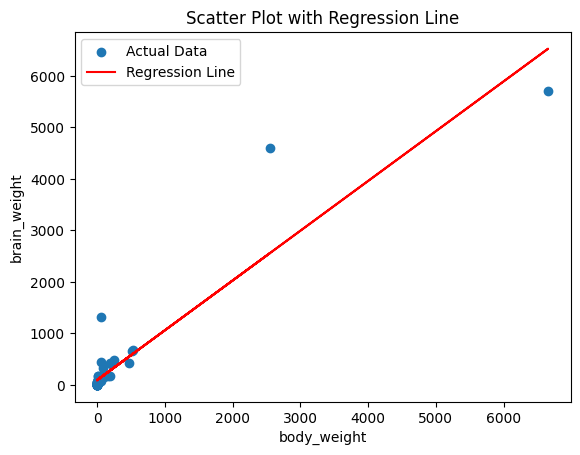

In [64]:
body_data = mammals['body_weight']
# Plot the scatter plot
plt.scatter(body_data, brain_data, label='Actual Data')

# Plot the regression line
plt.plot(body_data, y_pred, color='red', label='Regression Line')

# Add labels and a legend
plt.xlabel('body_weight')
plt.ylabel('brain_weight')
plt.title('Scatter Plot with Regression Line')
plt.legend()
 


In [65]:
sk_regr.predict([[1,2000]])

c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2023.99713155])

In [88]:
new_body = np.linspace(0, 7000, 10)
new_body = sm.add_constant(new_body)
# new_body = new_body[:, np.newaxis]
new_body

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.77777778e+02],
       [1.00000000e+00, 1.55555556e+03],
       [1.00000000e+00, 2.33333333e+03],
       [1.00000000e+00, 3.11111111e+03],
       [1.00000000e+00, 3.88888889e+03],
       [1.00000000e+00, 4.66666667e+03],
       [1.00000000e+00, 5.44444444e+03],
       [1.00000000e+00, 6.22222222e+03],
       [1.00000000e+00, 7.00000000e+03]])

In [89]:
brain_pred = sk_regr.predict(new_body)
brain_pred

c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([  91.00439621,  842.72379329, 1594.44319036, 2346.16258744,
       3097.88198452, 3849.6013816 , 4601.32077868, 5353.04017576,
       6104.75957284, 6856.47896992])